In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('SoyabeanData-Phase2.xlsx')
df.head()

,DISTRICTS,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,...,LST_AUG,LST_SEP,LST_OCT,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV
0,Anuppur,2010,0.402314,0.267127,0.422869,0.549074,0.635475,0.590291,0.499968,0.476485,...,303.4592,302.5775,303.1825,302.7825,3.680000,13.399120,9.782032,8.332526,1.451772,0.177238
1,Ashoknagar,2010,1.280708,0.204788,0.442124,0.636819,0.504908,0.363624,0.374139,0.271169,...,301.6130,305.5819,309.4097,305.8609,0.799692,12.214660,8.286234,6.260466,0.267456,0.831193
2,Balaghat,2010,1.741935,0.474099,0.370348,0.622812,0.761317,0.681799,0.646178,1.010184,...,300.4666,301.0198,301.0755,300.5775,4.437671,16.387600,16.124900,12.959230,1.698881,0.560686
3,Barwani,2010,0.286952,0.245248,0.338928,0.472167,0.560045,0.451814,0.437550,0.250737,...,299.5726,305.0602,308.8047,306.8003,4.333467,7.529426,10.633870,5.368312,1.044433,1.204902
4,Betul,2010,1.095832,0.363338,0.340311,0.536145,0.647831,0.564620,0.577530,0.615970,...,301.5153,303.1102,304.5974,302.6561,4.536366,15.414000,17.074730,9.245907,1.085629,1.406991


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTRICTS  460 non-null    object 
 1   YEAR       460 non-null    int64  
 2   YIELD      460 non-null    float64
 3   NDVI_JUN   460 non-null    float64
 4   NDVI_JUL   460 non-null    float64
 5   NDVI_AUG   460 non-null    float64
 6   NDVI_SEP   460 non-null    float64
 7   NDVI_OCT   460 non-null    float64
 8   NDVI_NOV   460 non-null    float64
 9   LAI_JUN    460 non-null    float64
 10  LAI_JUL    460 non-null    float64
 11  LAI_AUG    460 non-null    float64
 12  LAI_SEP    460 non-null    float64
 13  LAI_OCT    460 non-null    float64
 14  LAI_NOV    460 non-null    float64
 15  ET_JUN     460 non-null    float64
 16  ET_JUL     459 non-null    float64
 17  ET_AUG     460 non-null    float64
 18  ET_SEP     460 non-null    float64
 19  ET_OCT     460 non-null    float64
 20  ET_NOV    

In [4]:
df['ET_JUL'].fillna(method='pad', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTRICTS  460 non-null    object 
 1   YEAR       460 non-null    int64  
 2   YIELD      460 non-null    float64
 3   NDVI_JUN   460 non-null    float64
 4   NDVI_JUL   460 non-null    float64
 5   NDVI_AUG   460 non-null    float64
 6   NDVI_SEP   460 non-null    float64
 7   NDVI_OCT   460 non-null    float64
 8   NDVI_NOV   460 non-null    float64
 9   LAI_JUN    460 non-null    float64
 10  LAI_JUL    460 non-null    float64
 11  LAI_AUG    460 non-null    float64
 12  LAI_SEP    460 non-null    float64
 13  LAI_OCT    460 non-null    float64
 14  LAI_NOV    460 non-null    float64
 15  ET_JUN     460 non-null    float64
 16  ET_JUL     460 non-null    float64
 17  ET_AUG     460 non-null    float64
 18  ET_SEP     460 non-null    float64
 19  ET_OCT     460 non-null    float64
 20  ET_NOV    

In [6]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [7]:
df_dummies.columns

Index(['YEAR', 'YIELD', 'NDVI_JUN', 'NDVI_JUL', 'NDVI_AUG', 'NDVI_SEP',
       'NDVI_OCT', 'NDVI_NOV', 'LAI_JUN', 'LAI_JUL', 'LAI_AUG', 'LAI_SEP',
       'LAI_OCT', 'LAI_NOV', 'ET_JUN', 'ET_JUL', 'ET_AUG', 'ET_SEP', 'ET_OCT',
       'ET_NOV', 'LST_JUN', 'LST_JUL', 'LST_AUG', 'LST_SEP', 'LST_OCT',
       'LST_NOV', 'RF_JUN', 'RF_JUL', 'RF_AUG', 'RF_SEP', 'RF_OCT', 'RF_NOV',
       'DISTRICTS_Ashoknagar', 'DISTRICTS_Balaghat', 'DISTRICTS_Barwani',
       'DISTRICTS_Betul', 'DISTRICTS_Bhind', 'DISTRICTS_Bhopal',
       'DISTRICTS_Burhanpur', 'DISTRICTS_Chhatarpur', 'DISTRICTS_Chhindwara',
       'DISTRICTS_Damoh', 'DISTRICTS_Datia', 'DISTRICTS_Dewas',
       'DISTRICTS_Dhar', 'DISTRICTS_Dindori', 'DISTRICTS_Guna',
       'DISTRICTS_Gwalior', 'DISTRICTS_Harda', 'DISTRICTS_Hoshangabad',
       'DISTRICTS_Indore', 'DISTRICTS_Jabalpur', 'DISTRICTS_Jhabua',
       'DISTRICTS_Katni', 'DISTRICTS_Mandla', 'DISTRICTS_Mandsaur',
       'DISTRICTS_Morena', 'DISTRICTS_Narsinghpur', 'DISTRICTS_Neemuch

In [8]:
df_dummies.shape

(460, 77)

## Variable Selection by Correlation and Significance

In [9]:
# Calculate correlations between predictor variables and the response variable
corrs = df_dummies.corr()['YIELD'].sort_values(ascending=False)

In [10]:
from scipy.stats import pearsonr
#from scipy.stats import spearmanr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'YIELD']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['YIELD'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
RF_JUN,-0.247799,0.000000
RF_AUG,-0.216494,0.000003
LST_OCT,0.212505,0.000004
LST_SEP,0.191915,0.000034
LAI_JUL,-0.189432,0.000043
ET_OCT,-0.188750,0.000046
NDVI_OCT,-0.186177,0.000059
LST_NOV,0.183406,0.000076
ET_NOV,-0.159235,0.000608
DISTRICTS_Umaria,-0.153221,0.000978


In [11]:
# importing the modules
from tabulate import tabulate

# displaying the DataFrame
print(tabulate(df_cp_sorted, headers = 'keys', tablefmt = 'pretty'))

+-----------------------+-------------------------+----------+
|                       | Correlation_Coefficient | P_Value  |
+-----------------------+-------------------------+----------+
|        RF_JUN         |   -0.2477990780454609   |   0.0    |
|        RF_AUG         |  -0.21649411076000988   |  3e-06   |
|        LST_OCT        |   0.21250472230307704   |  4e-06   |
|        LST_SEP        |   0.19191536679703272   | 3.4e-05  |
|        LAI_JUL        |  -0.18943152104252955   | 4.3e-05  |
|        ET_OCT         |  -0.18874953681939524   | 4.6e-05  |
|       NDVI_OCT        |  -0.18617740599532712   | 5.9e-05  |
|        LST_NOV        |   0.18340553627619852   | 7.6e-05  |
|        ET_NOV         |  -0.15923493411825154   | 0.000608 |
|   DISTRICTS_Umaria    |   -0.1532206548357708   | 0.000978 |
| DISTRICTS_Chhindwara  |   0.15289436302301623   | 0.001003 |
|        RF_OCT         |  -0.15062831495842238   | 0.001194 |
|         YEAR          |  -0.14688880153543424   | 0.0

In [27]:
# The dependent variable remains the same:
y_name = 'YIELD'
y_data = df_dummies[y_name]  

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names]

In [14]:
X_data.shape

(460, 29)

In [15]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columns where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,LST_OCT,LST_SEP,LST_NOV,DISTRICTS_Chhindwara,DISTRICTS_Gwalior,LST_JUL,DISTRICTS_Dhar,DISTRICTS_Morena,NDVI_JUN,ET_AUG,...,NDVI_JUL,YEAR,RF_OCT,DISTRICTS_Umaria,ET_NOV,NDVI_OCT,ET_OCT,LAI_JUL,RF_AUG,RF_JUN
LST_OCT,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.912109,NaN,NaN,NaN,NaN
LST_SEP,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LST_NOV,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTRICTS_Chhindwara,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTRICTS_Gwalior,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LST_JUL,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTRICTS_Dhar,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTRICTS_Morena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDVI_JUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ET_AUG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,NDVI_OCT,LAI_OCT,NDVI_NOV,LAI_NOV,NDVI_OCT,LAI_NOV,LST_OCT,LAI_OCT,ET_OCT,NDVI_OCT
LST_OCT,-0.912109,-0.869966,-0.788260,-0.797912,-0.912109,-0.797912,1.000000,-0.869966,-0.898784,-0.912109
LAI_NOV,0.893205,0.941497,0.938392,1.000000,0.893205,1.000000,-0.797912,0.941497,0.839820,0.893205
LAI_NOV,0.893205,0.941497,0.938392,1.000000,0.893205,1.000000,-0.797912,0.941497,0.839820,0.893205
LAI_OCT,0.949616,1.000000,0.862876,0.941497,0.949616,0.941497,-0.869966,1.000000,0.889028,0.949616
LAI_OCT,0.949616,1.000000,0.862876,0.941497,0.949616,0.941497,-0.869966,1.000000,0.889028,0.949616
NDVI_NOV,0.882794,0.862876,1.000000,0.938392,0.882794,0.938392,-0.788260,0.862876,0.862314,0.882794
NDVI_OCT,1.000000,0.949616,0.882794,0.893205,1.000000,0.893205,-0.912109,0.949616,0.916323,1.000000
NDVI_OCT,1.000000,0.949616,0.882794,0.893205,1.000000,0.893205,-0.912109,0.949616,0.916323,1.000000
NDVI_OCT,1.000000,0.949616,0.882794,0.893205,1.000000,0.893205,-0.912109,0.949616,0.916323,1.000000
ET_OCT,0.916323,0.889028,0.862314,0.839820,0.916323,0.839820,-0.898784,0.889028,1.000000,0.916323


In [17]:
# find correlation between features with a 0.9 <corr<-0.9 and yield

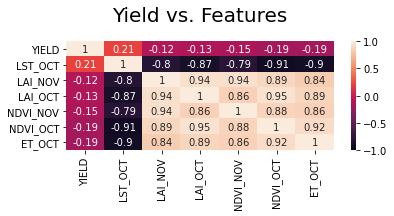

In [18]:
fig3 = plt.figure(figsize=(6,2))
heatmap = sns.heatmap(df[['YIELD', 'LST_OCT', 'LAI_NOV', 'LAI_OCT', 'NDVI_NOV', 'NDVI_OCT', 'ET_OCT']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Yield vs. Features', fontdict={'fontsize':20}, pad=20);
plt.show()

In [19]:
cor_matrix = X_data.corr().abs()
print(cor_matrix)

                       LST_OCT   LST_SEP   LST_NOV  DISTRICTS_Chhindwara  \
LST_OCT               1.000000  0.826245  0.811683          1.363568e-01   
LST_SEP               0.826245  1.000000  0.539246          1.222908e-01   
LST_NOV               0.811683  0.539246  1.000000          6.905747e-02   
DISTRICTS_Chhindwara  0.136357  0.122291  0.069057          1.000000e+00   
DISTRICTS_Gwalior     0.025304  0.086788  0.054519          2.222222e-02   
LST_JUL               0.328518  0.180757  0.241477          5.688745e-02   
DISTRICTS_Dhar        0.093837  0.019472  0.181147          2.222222e-02   
DISTRICTS_Morena      0.096997  0.152382  0.052788          2.222222e-02   
NDVI_JUN              0.453391  0.338259  0.475797          1.399052e-01   
ET_AUG                0.191121  0.151746  0.166768          7.178977e-02   
DISTRICTS_Raisen      0.030671  0.040428  0.009222          2.222222e-02   
RF_SEP                0.440315  0.642242  0.203597          4.895978e-02   
DISTRICTS_Sa

In [20]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                      LST_OCT   LST_SEP   LST_NOV  DISTRICTS_Chhindwara  \
LST_OCT                   NaN  0.826245  0.811683              0.136357   
LST_SEP                   NaN       NaN  0.539246              0.122291   
LST_NOV                   NaN       NaN       NaN              0.069057   
DISTRICTS_Chhindwara      NaN       NaN       NaN                   NaN   
DISTRICTS_Gwalior         NaN       NaN       NaN                   NaN   
LST_JUL                   NaN       NaN       NaN                   NaN   
DISTRICTS_Dhar            NaN       NaN       NaN                   NaN   
DISTRICTS_Morena          NaN       NaN       NaN                   NaN   
NDVI_JUN                  NaN       NaN       NaN                   NaN   
ET_AUG                    NaN       NaN       NaN                   NaN   
DISTRICTS_Raisen          NaN       NaN       NaN                   NaN   
RF_SEP                    NaN       NaN       NaN                   NaN   
DISTRICTS_Satna          

<ipython-input-20-56dc5b2d0b9d>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [21]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['LAI_OCT', 'NDVI_NOV', 'NDVI_OCT', 'ET_OCT']


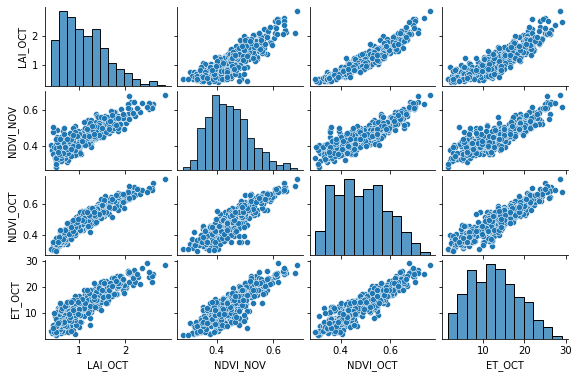

In [22]:
from seaborn import pairplot
g = pairplot(df_dummies[['LAI_OCT', 'NDVI_NOV', 'NDVI_OCT', 'ET_OCT']])
g.fig.set_size_inches(8,5)

In [23]:
X_filtered = X_data.drop(X_data[to_drop], axis=1)
X_filtered.head()

,LST_OCT,LST_SEP,LST_NOV,DISTRICTS_Chhindwara,DISTRICTS_Gwalior,LST_JUL,DISTRICTS_Dhar,DISTRICTS_Morena,NDVI_JUN,ET_AUG,...,LST_JUN,ET_JUL,NDVI_JUL,YEAR,RF_OCT,DISTRICTS_Umaria,ET_NOV,LAI_JUL,RF_AUG,RF_JUN
0,303.1825,302.5775,302.7825,0,0,308.3168,0,0,0.267127,23.41261,...,316.1967,14.637270,0.422869,2010,1.451772,0,15.75475,0.566221,9.782032,3.680000
1,309.4097,305.5819,305.8609,0,0,309.7163,0,0,0.204788,20.63337,...,318.6019,9.700475,0.442124,2010,0.267456,0,10.64300,0.553859,8.286234,0.799692
2,301.0755,301.0198,300.5775,0,0,300.9777,0,0,0.474099,27.47431,...,313.5907,18.696250,0.370348,2010,1.698881,0,19.99402,0.666346,16.124900,4.437671
3,308.8047,305.0602,306.8003,0,0,303.6777,0,0,0.245248,20.57688,...,316.8372,17.638150,0.338928,2010,1.044433,0,12.28831,0.489577,10.633870,4.333467
4,304.5974,303.1102,302.6561,0,0,303.7356,0,0,0.363338,24.97886,...,315.6665,17.616220,0.340311,2010,1.085629,0,16.65617,0.651014,17.074730,4.536366


In [24]:
X_filtered.shape

(460, 25)

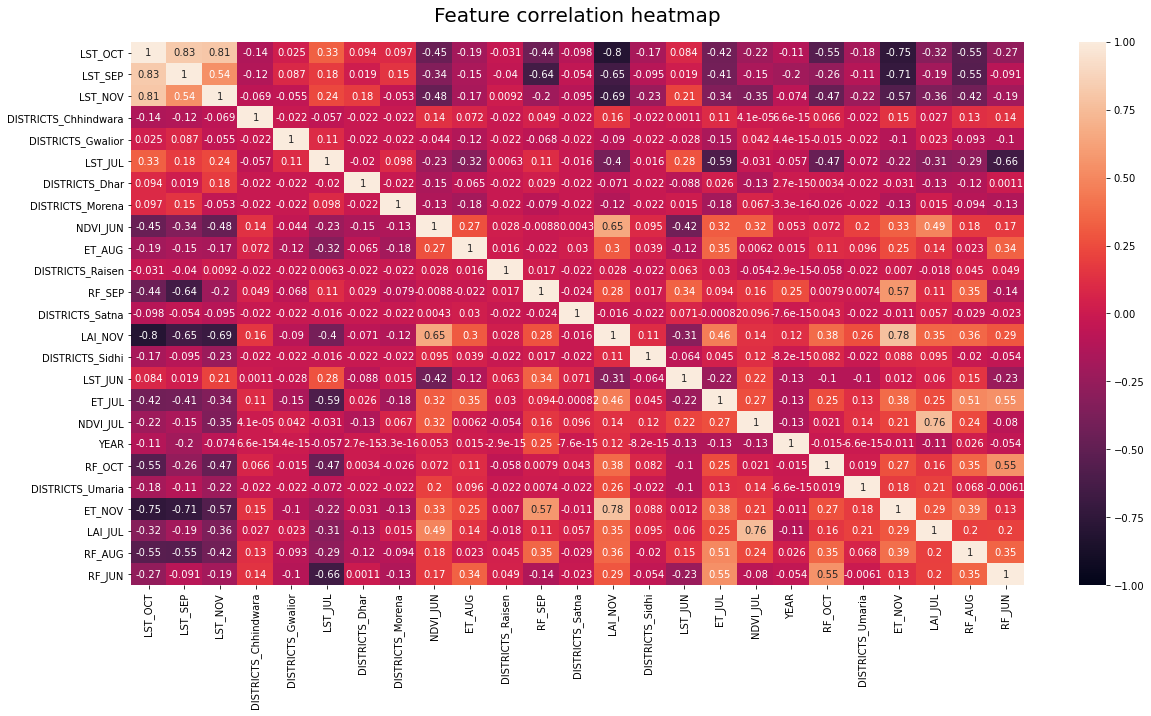

In [25]:
fig3 = plt.figure(figsize=(20,10))
heatmap = sns.heatmap(X_filtered.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Feature correlation heatmap', fontdict={'fontsize':20}, pad=20);
plt.show()

In [28]:
# Lets take a new subset of our potential independent variables
X_remove = ['LAI_OCT', 'NDVI_NOV', 'NDVI_OCT', 'ET_OCT']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	YIELD ~ LST_OCT + LST_SEP + LST_NOV + DISTRICTS_Chhindwara + DISTRICTS_Gwalior + LST_JUL + DISTRICTS_Dhar + DISTRICTS_Morena + NDVI_JUN + ET_AUG + DISTRICTS_Raisen + RF_SEP + DISTRICTS_Satna + LAI_NOV + DISTRICTS_Sidhi + LST_JUN + ET_JUL + NDVI_JUL + YEAR + RF_OCT + DISTRICTS_Umaria + ET_NOV + LAI_JUL + RF_AUG + RF_JUN


In [29]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

NameError: name 'ols' is not defined

## Variable Selection by Variance Thresholds

In [30]:
# Separate data into independent (X) and independent (y) variables
y_name = 'YIELD'
X_names = list(df_dummies.columns)
X_names.remove(y_name)
X_data = df_dummies[X_names]
y_data = df_dummies[y_name]

In [31]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled_2 = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled_2, columns=X_data.columns)

### Variance threshold in sklearn

In [32]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [33]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
0,YEAR,0.101852
23,LST_OCT,0.052662
14,ET_JUL,0.050268
5,NDVI_OCT,0.046765
17,ET_OCT,0.045740
...,...,...
46,DISTRICTS_Gwalior,0.021267
45,DISTRICTS_Guna,0.021267
30,RF_NOV,0.018467
15,ET_AUG,0.015352


In [34]:
df_vars_2 = df_vars.set_index('Variable_Name')

In [35]:
df_vars_2.head()

,Variance
Variable_Name,
YEAR,0.101852
NDVI_JUN,0.024272
NDVI_JUL,0.039081
NDVI_AUG,0.035077
NDVI_SEP,0.033982


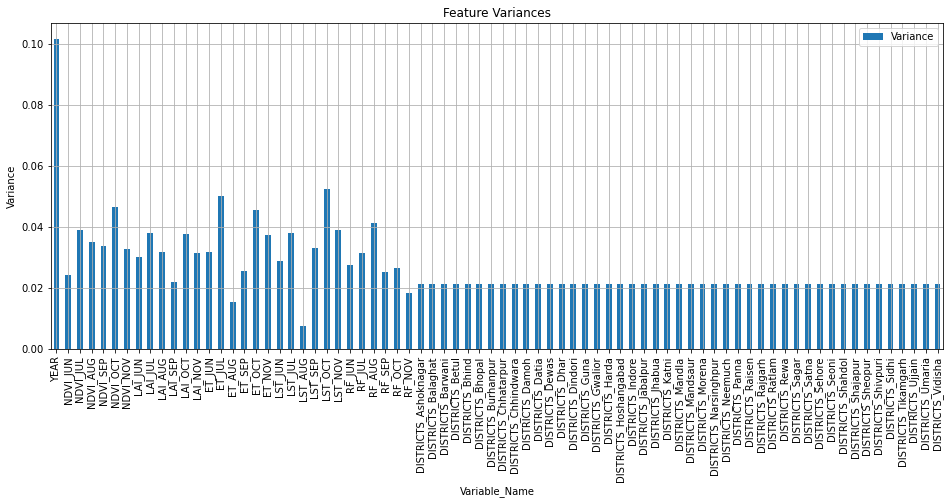

In [36]:
fig, ax = plt.subplots(figsize=(16, 6))
for col in df_vars_2.columns:    
    df_vars_2.plot(y=col, use_index=True, ax=ax, kind='bar', grid=True, title='Feature Variances', ylabel='Variance')
plt.show()

In [37]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,YEAR,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,LAI_JUL,LAI_AUG,LAI_OCT,...,ET_JUN,ET_JUL,ET_OCT,ET_NOV,LST_JUL,LST_SEP,LST_OCT,LST_NOV,RF_JUL,RF_AUG
0,0.0,0.651255,0.669488,0.638016,0.633156,0.541810,0.260753,0.387662,0.583553,0.442820,...,0.179157,0.502350,0.729252,0.774449,0.594414,0.342602,0.211364,0.310030,0.390461,0.343210
1,0.0,0.690598,0.880685,0.333644,0.143561,0.230788,0.072678,0.376560,0.821483,0.092284,...,0.062518,0.323513,0.391765,0.502478,0.669071,0.625209,0.683766,0.600615,0.337875,0.269866
2,0.0,0.543941,0.846971,0.931373,0.830811,0.903210,0.749635,0.477589,0.625898,0.701736,...,0.563811,0.649388,0.869886,1.000000,0.202905,0.196078,0.051525,0.101890,0.523141,0.654220
3,0.0,0.479742,0.484378,0.462177,0.334049,0.387526,0.053962,0.318825,0.333626,0.184251,...,0.383394,0.611058,0.459095,0.590017,0.346938,0.576136,0.637870,0.689290,0.129863,0.384978
4,0.0,0.482568,0.638369,0.666820,0.577707,0.733527,0.388525,0.463818,0.467282,0.394257,...,0.459401,0.610263,0.636847,0.822409,0.350027,0.392710,0.318700,0.298099,0.479916,0.700793


In [38]:
X_new.shape

(460, 21)

In [39]:
# Create Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = selector

In [40]:
selector_1.fit(X_normalize)

VarianceThreshold(threshold=0.05)

In [41]:
selector_2.fit(X_normalize)

VarianceThreshold(threshold=0.1)

In [42]:
selector_3.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [43]:
# Select subset of columns
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]

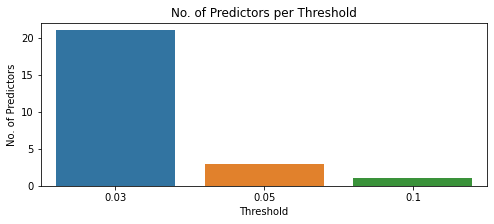

In [46]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_3.shape[1], X_1.shape[1], X_2.shape[1]]
thresholds = ['0.03', '0.05', '0.1']

# Plot graph
ax.set_title('No. of Predictors per Threshold')
ax.set_ylabel('No. of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

### Preprocess data

In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [48]:
X_filtered_2 = [col for col in X_data]

In [49]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_filtered_2]
X_corr_test = X_test[X_filtered_2]

In [50]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=45)
rf_corr = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=45)
rf_var = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=45)

In [54]:
rf.fit(X_train, y_train);
rf_corr.fit(X_corr_train,y_train);
rf_var.fit(X_var_train, y_train);

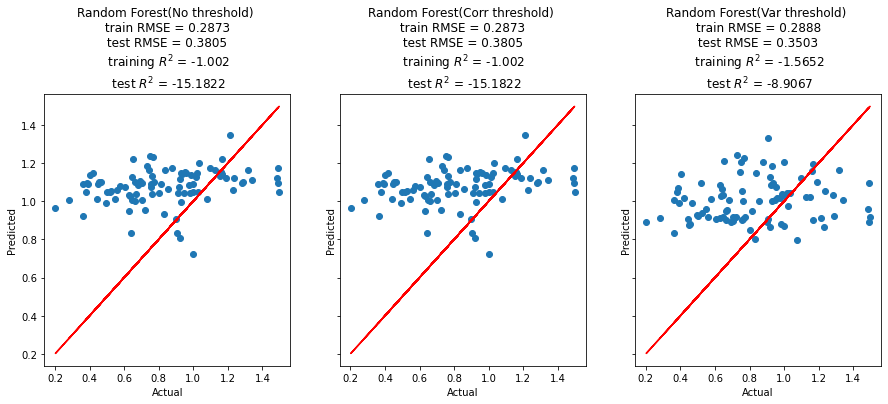

In [57]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [rf.predict(X_train),
              rf_corr.predict(X_corr_train),
             rf_var.predict(X_var_train)]
test_pred = [rf.predict(X_test),
             rf_corr.predict(X_corr_test),
            rf_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - random forest regression with all predictive variables
# Corr threshold - random forest regression with correlation thresholded predictive variables
# Var threshold - random forest regression with variance thresholded predictive variables


from sklearn.metrics import mean_squared_error, r2_score
# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(np.sqrt(mean_squared_error(test_pred[i], y_test)), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(np.sqrt(mean_squared_error(train_pred[i], y_train)), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Random Forest({title[i]}) \n train RMSE = {train_mse} \n " + \
                f"test RMSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

In [59]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [60]:
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

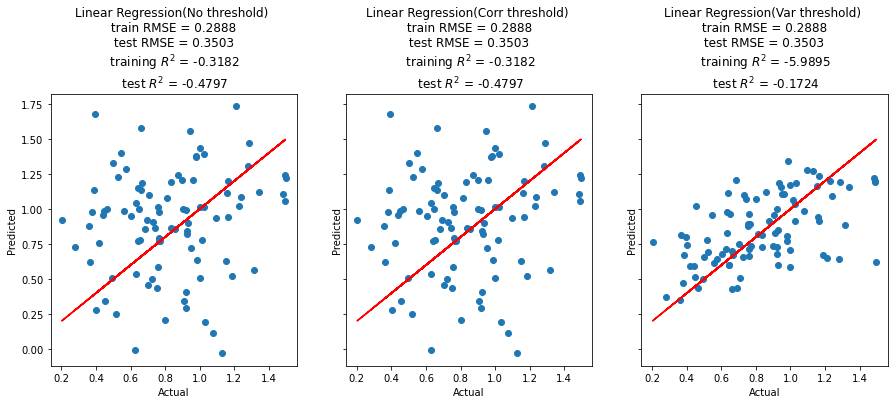

In [61]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
             lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
            lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_rmse = round(np.sqrt(mean_squared_error(test_pred[i], y_test)), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_rmse = round(np.sqrt(mean_squared_error(train_pred[i], y_train)), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train RMSE = {train_mse} \n " + \
                f"test RMSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])